# 파이토치(PyTorch)

<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbuUgoV%2FbtqwWZvcHHX%2Fd6XzIFBEfiuFb0UvyV4A50%2Fimg.jpg" width="300">

- 코드 출처: https://pytorch.org/tutorials/

## 파이토치의 구성요소

- `torch`: 텐서를 생성하는 라이브러리

- `torch.autograd`: 자동미분 기능을 제공하는 라이브러리

- `torch.nn`: 신경망을 생성하는 라이브러리

- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리

- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공

- `torch.legacy`(./nn/.optim): Torch로부터 포팅해온 코드

- `torch.onnx`: ONNX(Open Neural Network Exchange)

  - 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)
- 넘파이(NumPy)의 ndarray와 유사

- GPU를 사용한 연산 가속도 가능

In [1]:
import torch

### 초기화 되지 않은 행렬

In [2]:
x = torch.empty(4, 2)

In [3]:
x

tensor([[-9.3960e-37,  4.3435e-41],
        [-1.0486e+38,  3.0850e-41],
        [ 0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]])

### 무작위로 초기화된 행렬

In [4]:
torch.rand(4, 2)

tensor([[0.5770, 0.2669],
        [0.0078, 0.7064],
        [0.8910, 0.2781],
        [0.5097, 0.0463]])

### dtype이 long, 0으로 채워진 텐서

In [7]:
x = torch.zeros(4, 2, dtype=torch.long)
x

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])

In [6]:
torch.tensor([3, 2.3])

tensor([3.0000, 2.3000])

In [9]:
x.new_ones(2, 4, dtype=torch.double)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)

In [10]:
torch.randn_like(x, dtype=torch.float)

tensor([[-0.6821,  0.4338],
        [-1.0401, -0.4225],
        [-0.7496, -0.7407],
        [-0.9910,  0.7802]])

### 텐서의 크기

In [11]:
x.size()

torch.Size([4, 2])

## 텐서의 연산(operations)

### 덧셈 1

In [12]:
x

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])

In [14]:
y = torch.rand(4, 2)
print(x+y)

tensor([[0.4831, 0.5926],
        [0.2203, 0.3847],
        [0.1389, 0.8385],
        [0.3956, 0.5955]])


### 덧셈2

In [15]:
torch.add(x, y)

tensor([[0.4831, 0.5926],
        [0.2203, 0.3847],
        [0.1389, 0.8385],
        [0.3956, 0.5955]])

### 덧셈3
- 결과 텐서를 인자로 제공

In [16]:
result = torch.empty(4, 2)
torch.add(x, y, out=result)

tensor([[0.4831, 0.5926],
        [0.2203, 0.3847],
        [0.1389, 0.8385],
        [0.3956, 0.5955]])

In [17]:
result

tensor([[0.4831, 0.5926],
        [0.2203, 0.3847],
        [0.1389, 0.8385],
        [0.3956, 0.5955]])

### 덧셈4
- `in-place` 방식

- (참고) in-place 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [18]:
print(x)
print(y)
y.add_(x)
print(y)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])
tensor([[0.4831, 0.5926],
        [0.2203, 0.3847],
        [0.1389, 0.8385],
        [0.3956, 0.5955]])
tensor([[0.4831, 0.5926],
        [0.2203, 0.3847],
        [0.1389, 0.8385],
        [0.3956, 0.5955]])


In [19]:
print(y)
y.add_(y)
print(y)

tensor([[0.4831, 0.5926],
        [0.2203, 0.3847],
        [0.1389, 0.8385],
        [0.3956, 0.5955]])
tensor([[0.9662, 1.1851],
        [0.4405, 0.7695],
        [0.2778, 1.6771],
        [0.7912, 1.1909]])


### 그 외의 연산
- `torch.sub` : 뺄셈

- `torch.mul` : 곱셉

- `torch.div` : 나눗셈

- `torch.mm` : 내적(dot product)

In [21]:
x = torch.Tensor([[1, 3],
                  [5, 7]])
y = torch.Tensor([[2, 4],
                  [6, 8]])

In [24]:
x-y

tensor([[-1., -1.],
        [-1., -1.]])

In [25]:
torch.sub(x, y)

tensor([[-1., -1.],
        [-1., -1.]])

In [26]:
x.sub(y)

tensor([[-1., -1.],
        [-1., -1.]])

In [27]:
x*y

tensor([[ 2., 12.],
        [30., 56.]])

In [28]:
torch.mul(x, y)

tensor([[ 2., 12.],
        [30., 56.]])

In [29]:
x.mul(y)

tensor([[ 2., 12.],
        [30., 56.]])

In [30]:
x.div(y)

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])

In [31]:
x.mm(y)

tensor([[20., 28.],
        [52., 76.]])

## 텐서의 조작(manipulations)

### 인덱싱
- 넘파이처럼 인덱싱 사용가능

In [34]:
x

tensor([[1., 3.],
        [5., 7.]])

In [33]:
x[:, 1]

tensor([3., 7.])

### view
- 텐서의 크기(size)나 모양(shape)을 변경

In [36]:
x = torch.randn(4, 5)
y = x.view(20)
z = x.view(5, -1)

In [38]:
print(x.size(), y.size(), z.size())

torch.Size([4, 5]) torch.Size([20]) torch.Size([5, 4])


In [39]:
print(x, y, z)

tensor([[ 5.3309e-01, -1.1440e+00, -1.1290e+00,  5.9254e-01, -3.9213e-01],
        [ 5.5328e-01,  5.1209e-01, -8.0870e-01, -6.2580e-02,  2.0356e+00],
        [ 3.9896e-01, -6.8472e-01, -1.0434e+00, -7.7691e-01, -8.4667e-01],
        [-6.6549e-01, -9.7533e-01,  1.4123e+00, -8.4015e-05,  8.7223e-01]]) tensor([ 5.3309e-01, -1.1440e+00, -1.1290e+00,  5.9254e-01, -3.9213e-01,
         5.5328e-01,  5.1209e-01, -8.0870e-01, -6.2580e-02,  2.0356e+00,
         3.9896e-01, -6.8472e-01, -1.0434e+00, -7.7691e-01, -8.4667e-01,
        -6.6549e-01, -9.7533e-01,  1.4123e+00, -8.4015e-05,  8.7223e-01]) tensor([[ 5.3309e-01, -1.1440e+00, -1.1290e+00,  5.9254e-01],
        [-3.9213e-01,  5.5328e-01,  5.1209e-01, -8.0870e-01],
        [-6.2580e-02,  2.0356e+00,  3.9896e-01, -6.8472e-01],
        [-1.0434e+00, -7.7691e-01, -8.4667e-01, -6.6549e-01],
        [-9.7533e-01,  1.4123e+00, -8.4015e-05,  8.7223e-01]])


### item
- 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [41]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.3902])
-0.39020800590515137
torch.float32


- 스칼라값 하나만 존재해야함

In [42]:
x = torch.randn(2)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.7902, -1.0640])


RuntimeError: ignored

### squeeze
- 차원을 축소(제거)

In [45]:
tensor = torch.rand(1, 3, 3)
print(tensor)
tensor.shape

tensor([[[0.8941, 0.9063, 0.0712],
         [0.0561, 0.9455, 0.6675],
         [0.2822, 0.4245, 0.7720]]])


torch.Size([1, 3, 3])

In [44]:
t = tensor.squeeze()
t

tensor([[0.3885, 0.3508, 0.2627],
        [0.5849, 0.3523, 0.9642],
        [0.1513, 0.2076, 0.1335]])

### unsqueeze
- 차원을 증가(생성)

In [46]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.2821, 0.1807, 0.3948],
         [0.9692, 0.6952, 0.7625],
         [0.7916, 0.3858, 0.1694]]])
torch.Size([1, 3, 3])


In [48]:
t = tensor.unsqueeze(dim=0)
print(t)
print(t.shape)

tensor([[[[0.2821, 0.1807, 0.3948],
          [0.9692, 0.6952, 0.7625],
          [0.7916, 0.3858, 0.1694]]]])
torch.Size([1, 1, 3, 3])


### stack
- 텐서간 결합

In [49]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

torch.stack([x, y, z])

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

### cat
- 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 dim이 존재해야함
  - 예를 들어, 해당 차원을 늘려준 후 결합


In [50]:
a = torch.randn(1, 1, 3, 3)
b = torch.randn(1, 1, 3, 3)
c = torch.cat((a, b), dim=0)

In [51]:
c

tensor([[[[-0.8406,  1.0570, -1.9302],
          [-0.9393, -0.4856,  0.7101],
          [ 2.2554, -2.3089,  1.0514]]],


        [[[ 2.1536,  0.0044,  1.6051],
          [-1.4184,  0.9884, -0.3276],
          [-1.2999,  1.3322,  1.4259]]]])

In [52]:
c.shape

torch.Size([2, 1, 3, 3])

In [54]:
a = torch.randn(1, 3, 3)
b = torch.randn(1, 3, 3)
c = torch.cat((a, b), dim=0)
print(c)
print(c.shape)

tensor([[[-1.1231, -1.7599, -0.2218],
         [ 0.4823, -0.4349,  0.3466],
         [ 0.3039, -0.1464, -0.0402]],

        [[ 0.7604, -0.4470,  1.6076],
         [ 0.5348,  0.9321, -0.5853],
         [ 1.1254, -1.4468,  2.0422]]])
torch.Size([2, 3, 3])


In [55]:
a = torch.randn(1, 3, 3)
b = torch.randn(1, 3, 3)
c = torch.cat((a, b), dim=2)
print(c)
print(c.shape)

tensor([[[ 0.0196,  0.9802,  0.7931,  0.1568, -1.7531, -0.7615],
         [-0.1359, -2.3838, -0.2328, -0.7161, -0.0885, -0.7726],
         [-0.7621,  1.1807,  0.4382, -0.1450,  1.0651,  1.7736]]])
torch.Size([1, 3, 6])


### chuck
- 텐서를 여러 개로 나눌 때 사용

- 몇 개의 텐서로 나눌 것이냐

In [57]:
tensor = torch.rand(3, 6)
t1, t2, t3 = torch.chunk(tensor, 3, dim=1)

In [59]:
print(tensor)
print(t1, t2, t3)

tensor([[0.4635, 0.9233, 0.8121, 0.4594, 0.1271, 0.8695],
        [0.6006, 0.0519, 0.4840, 0.3780, 0.4507, 0.3338],
        [0.3861, 0.2570, 0.3368, 0.8645, 0.0277, 0.6405]])
tensor([[0.4635, 0.9233],
        [0.6006, 0.0519],
        [0.3861, 0.2570]]) tensor([[0.8121, 0.4594],
        [0.4840, 0.3780],
        [0.3368, 0.8645]]) tensor([[0.1271, 0.8695],
        [0.4507, 0.3338],
        [0.0277, 0.6405]])


### split
- `chunck`와 동일한 기능이지만 조금 다름

- 하나의 텐서당 크기가 얼마이냐

In [61]:
tensor = torch.rand(3, 6)
t1, t2 = torch.split(tensor, 3, dim=1)

In [63]:
print(tensor)
print(t1)
print(t2)

tensor([[0.4515, 0.4166, 0.1404, 0.2569, 0.5518, 0.1839],
        [0.7322, 0.4235, 0.8748, 0.9431, 0.9496, 0.5232],
        [0.0778, 0.6213, 0.0246, 0.0338, 0.8604, 0.2597]])
tensor([[0.4515, 0.4166, 0.1404],
        [0.7322, 0.4235, 0.8748],
        [0.0778, 0.6213, 0.0246]])
tensor([[0.2569, 0.5518, 0.1839],
        [0.9431, 0.9496, 0.5232],
        [0.0338, 0.8604, 0.2597]])


### torch ↔ numpy
- Torch Tensor(텐서)를 Numpy array(배열)로 변환 가능

  - `numpy()`
  - `from_numpy()`

- (참고)
  - Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [65]:
a = torch.ones(7)
a

tensor([1., 1., 1., 1., 1., 1., 1.])

In [67]:
b = a.numpy()
b

array([1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [68]:
a.add_(1)

tensor([2., 2., 2., 2., 2., 2., 2.])

In [69]:
b

array([2., 2., 2., 2., 2., 2., 2.], dtype=float32)

In [70]:
import numpy as np

In [76]:
a = np.ones(7)
b = torch.from_numpy(a)

In [77]:
b

tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)

In [78]:
np.add(a, b, out=a)

array([2., 2., 2., 2., 2., 2., 2.])

In [79]:
b

tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)

## CUDA Tensors
- `.to` 메소드를 사용하여 텐서를 어떠한 장치로도 옮길 수 있음
  - 예) cpu, gpu

In [97]:
import torch

In [98]:
x = torch.randn(1)
x

tensor([0.1814])

In [99]:
x.item()

0.18135178089141846

In [100]:
x.dtype

torch.float32

In [101]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

In [102]:
device

device(type='cuda')

In [106]:
y = torch.ones_like(x, device=device)
x = x.to(device)
z = x+y

In [107]:
device

device(type='cuda')

In [108]:
z

tensor([1.1814], device='cuda:0')

In [109]:
z.to("cpu", torch.double)

tensor([1.1814], dtype=torch.float64)

In [110]:
z

tensor([1.1814], device='cuda:0')

In [112]:
x = x.to("cpu")

In [113]:
x

tensor([0.1814])

In [114]:
y = torch.ones_like(x, device=device)
x+y

RuntimeError: ignored

## AUTOGRAD (자동미분)
- autograd 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공

- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻

- backprop를 위한 미분값을 자동으로 계산

### Tensor

- data: tensor형태의 데이터

- grad: data가 겨쳐온 layer에 대한 미분값 저장

- grad_fn: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

- `requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

- 계산이 완료된 후, `.backward()`를 호출하면 자동으로 `gradient`를 계산할 수 있으며, `.grad` 속성에 누적됨

- 기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad():`로 감싸면 `gradient`는 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

- Autograd 구현에서 매우 중요한 클래스 : `Function` 클래스

In [115]:
import torch

In [146]:
x = torch.ones(3, 3, requires_grad=True)
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)

In [147]:
y = x + 5
y

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)

In [148]:
print(y.grad_fn)

In [152]:
z = y * y * 2
out = z.mean()

print(z)
print(out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>)
tensor(72., grad_fn=<MeanBackward0>)


- `requires_grad_(...)`는 기존 텐서의 `requires_grad`값을 바꿔치기(`in-place`)하여 변경

In [153]:
a = torch.randn(3, 3)
a = ((a*3)/(a-1))
print(a.requires_grad)

False


In [154]:
a.requires_grad_(True)

tensor([[-2.6016,  0.6185, -6.6495],
        [-0.6327,  6.9568, -5.3761],
        [ 7.7585,  0.3274, -1.0053]], requires_grad=True)

In [128]:
print(a.requires_grad)

True


In [130]:
b = (a*a).sum()
print(b.grad_fn)

### 기울기(Gradient)
- 역전파: `.backward()`를 통해 역전파 계산 가능

In [155]:
out.backward()

In [156]:
out

tensor(72., grad_fn=<MeanBackward0>)

In [157]:
print(x.grad)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])


In [158]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

In [159]:
y

tensor([ 1273.9651,  -126.0527, -1463.3040], grad_fn=<MulBackward0>)

In [138]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


- `with torch.no_grad()`를 사용하여 gradient의 업데이트를 하지 않음

In [139]:
x.requires_grad

True

In [140]:
(x**2).requires_grad

True

In [141]:
with torch.no_grad():
    print((x**2).requires_grad)

False


- `detach()`: 내용물(content)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [142]:
x.requires_grad

True

In [143]:
y = x.detach()
y.requires_grad

False

In [144]:
x.eq(y).all()

tensor(True)

In [164]:
print(y.grad_fn.next_functions)

((<MulBackward0 object at 0x79139962a1a0>, 0), (None, 0))


### 자동 미분 흐름 다시 보기(1)
- 계산 흐름  
  $a \rightarrow b  \rightarrow c  \rightarrow out $

<br>

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해  
  $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면  
    $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [165]:
import torch

In [166]:
a = torch.ones(2, 2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [169]:
a = torch.ones(2, 2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [170]:
print("a.data:", a)
print("a.grad:", a.grad)
print("a.grad_fn", a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad: None
a.grad_fn None


- $b = a + 2$

In [171]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


- $c = b^2$

In [172]:
c = b**2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [173]:
out = c.sum()

In [174]:
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [175]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


- a의 `grad_fn`이 None인 이유  
  직접적으로 계산한 부분이 없었기 때문

In [176]:
print("a.data:", a)
print("a.grad:", a.grad)
print("a.grad_fn", a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn None


In [177]:
print("b.data:", b)
print("b.grad:", b.grad)
print("b.grad_fn", b.grad_fn)

b.data: tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
b.grad: None
b.grad_fn <AddBackward0 object at 0x791399629db0>


<ipython-input-177-dcd2f8a54fcb>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print("b.grad:", b.grad)


In [178]:
print("c.data:", c)
print("c.grad:", c.grad)
print("c.grad_fn", c.grad_fn)

c.data: tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)
c.grad: None
c.grad_fn <PowBackward0 object at 0x7913996a49a0>


<ipython-input-178-0e7142bdf841>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print("c.grad:", c.grad)


In [179]:
print("out.data:", out)
print("out.grad:", out.grad)
print("out.grad_fn", out.grad_fn)

out.data: tensor(36., grad_fn=<SumBackward0>)
out.grad: None
out.grad_fn <SumBackward0 object at 0x7913996a4a00>


<ipython-input-179-f41ea53dc7ab>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print("out.grad:", out.grad)


### 자동 미분 흐름 다시 보기(2)
- `grad`값을 넣어서 `backward`

- 아래의 코드에서 `.grad`값이 None은 gradient값이 필요하지 않기 때문

In [181]:
x = torch.ones(3, requires_grad=True)
y = x**2
z = y**2 + x
out = z.sum()
print(out)

tensor(6., grad_fn=<SumBackward0>)


In [183]:
grad = torch.Tensor([0.1, 1, 100])
z.backward(grad)

In [184]:
print("x.data:", x)
print("x.grad:", x.grad)
print("x.grad_fn", x.grad_fn)

x.data: tensor([1., 1., 1.], requires_grad=True)
x.grad: tensor([  0.5000,   5.0000, 500.0000])
x.grad_fn None


In [185]:
print("y.data:", y)
print("y.grad:", y.grad)
print("y.grad_fn", y.grad_fn)

y.data: tensor([1., 1., 1.], grad_fn=<PowBackward0>)
y.grad: None
y.grad_fn <PowBackward0 object at 0x7913a2c9f5b0>


<ipython-input-185-0c4fd7c1ff45>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print("y.grad:", y.grad)


In [186]:
print("z.data:", z)
print("z.grad:", z.grad)
print("z.grad_fn", z.grad_fn)

z.data: tensor([2., 2., 2.], grad_fn=<AddBackward0>)
z.grad: None
z.grad_fn <AddBackward0 object at 0x7913996641c0>


<ipython-input-186-7a3fc72eb1c6>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print("z.grad:", z.grad)


In [187]:
print("out.data:", out)
print("out.grad:", out.grad)
print("out.grad_fn", out.grad_fn)

out.data: tensor(6., grad_fn=<SumBackward0>)
out.grad: None
out.grad_fn <SumBackward0 object at 0x791399665ae0>


<ipython-input-187-f41ea53dc7ab>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print("out.grad:", out.grad)


## nn & nn.functional

- 두 패키지가 같은 기능이지만 방식이 조금 다름

- 위의 `autograd` 관련 작업들을 두 패키지를 통해 진행할 수 있음

- 텐서를 직접 다룰 때 `requires_grad`와 같은 방식으로 진행할 수 있음

- 결론적으로, `torch.nn`은 attribute를 활용해 state를 저장하고 활용하고,  
  `torch.nn.functional`로 구현한 함수의 경우에는 인스턴스화 시킬 필요 없이 사용이 가능



### nn 패키지

- 주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때  
  - 따라서, `weight`값들을 직접 선언 안함

- 예시
  - Containers

  - Convolution Layers

  - Pooling layers

  - Padding Layers

  - Non-linear Activations (weighted sum, nonlinearity)

  - Non-linear Activations (other)

  - Normalization Layers

  - Recurrent Layers

  - Transformer Layers

  - Linear Layers

  - Dropout Layers

  - Sparse Layers

  - Distance Functions

  - Loss Functions

  - ..
- https://pytorch.org/docs/stable/nn.html



In [194]:
import torch
import torch.nn as nn

In [198]:
nn.Conv2d

torch.nn.modules.conv.Conv2d

- Convolution Layer 예시 (1)


In [199]:
m = nn.Conv2d(16, 33, 3, stride=2)
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))

input = torch.randn(20, 16, 50, 100)
output = m(input)

In [200]:
output.shape

torch.Size([20, 33, 26, 100])

### nn.functional 패키지

- 가중치를 직접 선언하여 인자로 넣어줘야함

- 예시)
  - Convolution functions

  - Pooling functions
  
  - Non-linear activation functions

  - Normalization functions

  - Linear functions

  - Dropout functions
  
  - Sparse functions
  
  - Distance functions

  - Loss functions
  - ..

- https://pytorch.org/docs/stable/nn.functional.html

In [201]:
import torch
import torch.nn.functional as F

- Convolution Layer 예시 (2)

In [202]:
filters = torch.randn(8, 4, 3, 3)

In [204]:
inputs = torch.randn(1, 4, 5, 5)
conv = F.conv2d(inputs, filters, padding=1)
conv.shape

torch.Size([1, 8, 5, 5])

## Torchvision

- `transforms`: 전처리할 때 사용하는 메소드

- `transforms`에서 제공하는 클래스 이외에  
  일반적으로 클래스를 따로 만들어 전처리 단계를 진행
  
  - 아래의 코드에서 다양한 전처리 기술 확인  
    https://pytorch.org/docs/stable/torchvision/transforms.html


In [205]:
import torch
import torchvision
import torchvision.transforms as transforms

- 예시)
  - `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있음

  - `Compose`를 통해 리스트 안에 순서대로 전처리 진행

  - 대표적인 예로, `ToTensor`()를 하는 이유는  
   <u>torchvision이 PIL Image형태로만 입력을 받기 때문에</u> 데이터 처리를 위해서 Tensor형으로 변환해야함

In [206]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5,), std=(0.5,))
                                ])

## utils.data

- `Dataset`에는 다양한 데이터셋이 존재  
  - MNIST, CIFAR10, ...

- `DataLoader`, `Dataset`을 통해  
  `batch_size`, `train`여부, `transform`등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [207]:
import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

In [208]:
trainset = torchvision.datasets.MNIST(root='/content/', train=True, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 111821581.38it/s]


Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 24853445.59it/s]


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33225038.30it/s]


Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20617455.38it/s]


Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [209]:
testset = torchvision.datasets.MNIST(root='/content/', train=False, download=True, transform=transform)

In [221]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=1)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=1)

- `batch_size`만큼 데이터를 하나씩 가져옴

In [222]:
images, labels = next(iter(train_loader))

In [223]:
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

<u>**(중요) torch에서는 channel(채널)이 앞에 옴**</u>

- `channel first`

- tensorflow, keras 등에서는 channel이 뒤에 옴(`channel last`)

### 데이터 확인

In [224]:
import matplotlib.pyplot as plt

In [226]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [228]:
labels[0]

tensor(5)

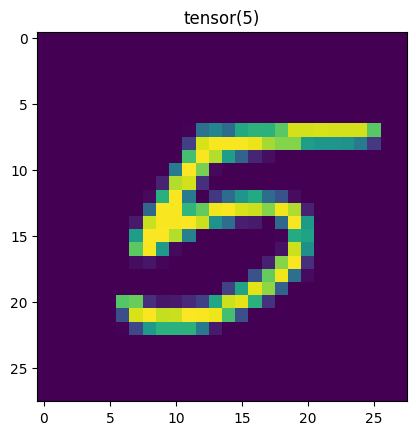

In [230]:
plt.title(labels[0])
plt.imshow(torch_image)

## 각 Layer 설명

### nn.Conv2d

- `in_channels`: channel의 갯수

- `out_channels`: 출력 채널의 갯수

- `kernel_size`: 커널(필터) 사이즈

- 텐서플로우, 케라스와 다르게 레이어의 `input`인자에도 값을 집어 넣어줘야함

- `wegiht`확인

- `weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

### Pooling
- `F.max_pool2d`
  - `stride`

  - `kernel_size`

- `torch.nn.MaxPool2d` 도 많이 사용

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

### Linear
- 1d만 가능 `.view()`를 통해 1D로 펼쳐줘야함

### Softmax

In [232]:
with torch.no_grad():
    flatten = torch_image.view(1, 28*28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = F.softmax(lin, dim=1)

In [233]:
softmax

tensor([[0.0483, 0.2110, 0.1323, 0.0362, 0.2256, 0.0493, 0.0608, 0.0341, 0.1153,
         0.0871]])

In [235]:
np.sum(softmax)

TypeError: ignored

In [234]:
np.sum(softmax.numpy())

1.0

### F.relu

- ReLU 함수를 적용하는 레이어

- `nn.ReLU`로도 사용 가능

In [236]:
inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [238]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape

## Optimizer

- `import torch.optim as optim`

- `model`의 파라미터를 업데이트

- 예시)
  ```python
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  ```

- `.zero_grad()`로 초기화
- `.step()`으로 업데이트

